Sonar Dataset: Binary classification


In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("sonar_all-data.csv")
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [4]:
df.shape

(207, 61)

In [5]:
df.columns

Index(['0.0200', '0.0371', '0.0428', '0.0207', '0.0954', '0.0986', '0.1539',
       '0.1601', '0.3109', '0.2111', '0.1609', '0.1582', '0.2238', '0.0645',
       '0.0660', '0.2273', '0.3100', '0.2999', '0.5078', '0.4797', '0.5783',
       '0.5071', '0.4328', '0.5550', '0.6711', '0.6415', '0.7104', '0.8080',
       '0.6791', '0.3857', '0.1307', '0.2604', '0.5121', '0.7547', '0.8537',
       '0.8507', '0.6692', '0.6097', '0.4943', '0.2744', '0.0510', '0.2834',
       '0.2825', '0.4256', '0.2641', '0.1386', '0.1051', '0.1343', '0.0383',
       '0.0324', '0.0232', '0.0027', '0.0065', '0.0159', '0.0072', '0.0167',
       '0.0180', '0.0084', '0.0090', '0.0032', 'R'],
      dtype='object')

In [6]:
df["R"].unique()

array(['R', 'M'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0200  207 non-null    float64
 1   0.0371  207 non-null    float64
 2   0.0428  207 non-null    float64
 3   0.0207  207 non-null    float64
 4   0.0954  207 non-null    float64
 5   0.0986  207 non-null    float64
 6   0.1539  207 non-null    float64
 7   0.1601  207 non-null    float64
 8   0.3109  207 non-null    float64
 9   0.2111  207 non-null    float64
 10  0.1609  207 non-null    float64
 11  0.1582  207 non-null    float64
 12  0.2238  207 non-null    float64
 13  0.0645  207 non-null    float64
 14  0.0660  207 non-null    float64
 15  0.2273  207 non-null    float64
 16  0.3100  207 non-null    float64
 17  0.2999  207 non-null    float64
 18  0.5078  207 non-null    float64
 19  0.4797  207 non-null    float64
 20  0.5783  207 non-null    float64
 21  0.5071  207 non-null    float64
 22  0.

So there are no null values in the dataset

In [8]:
df.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


## Data Exploration

In [10]:
df.groupby("R")["R"].count()

R
M    111
R     96
Name: R, dtype: int64

All Values are continous, looking for correlation

<IPython.core.display.Javascript object>


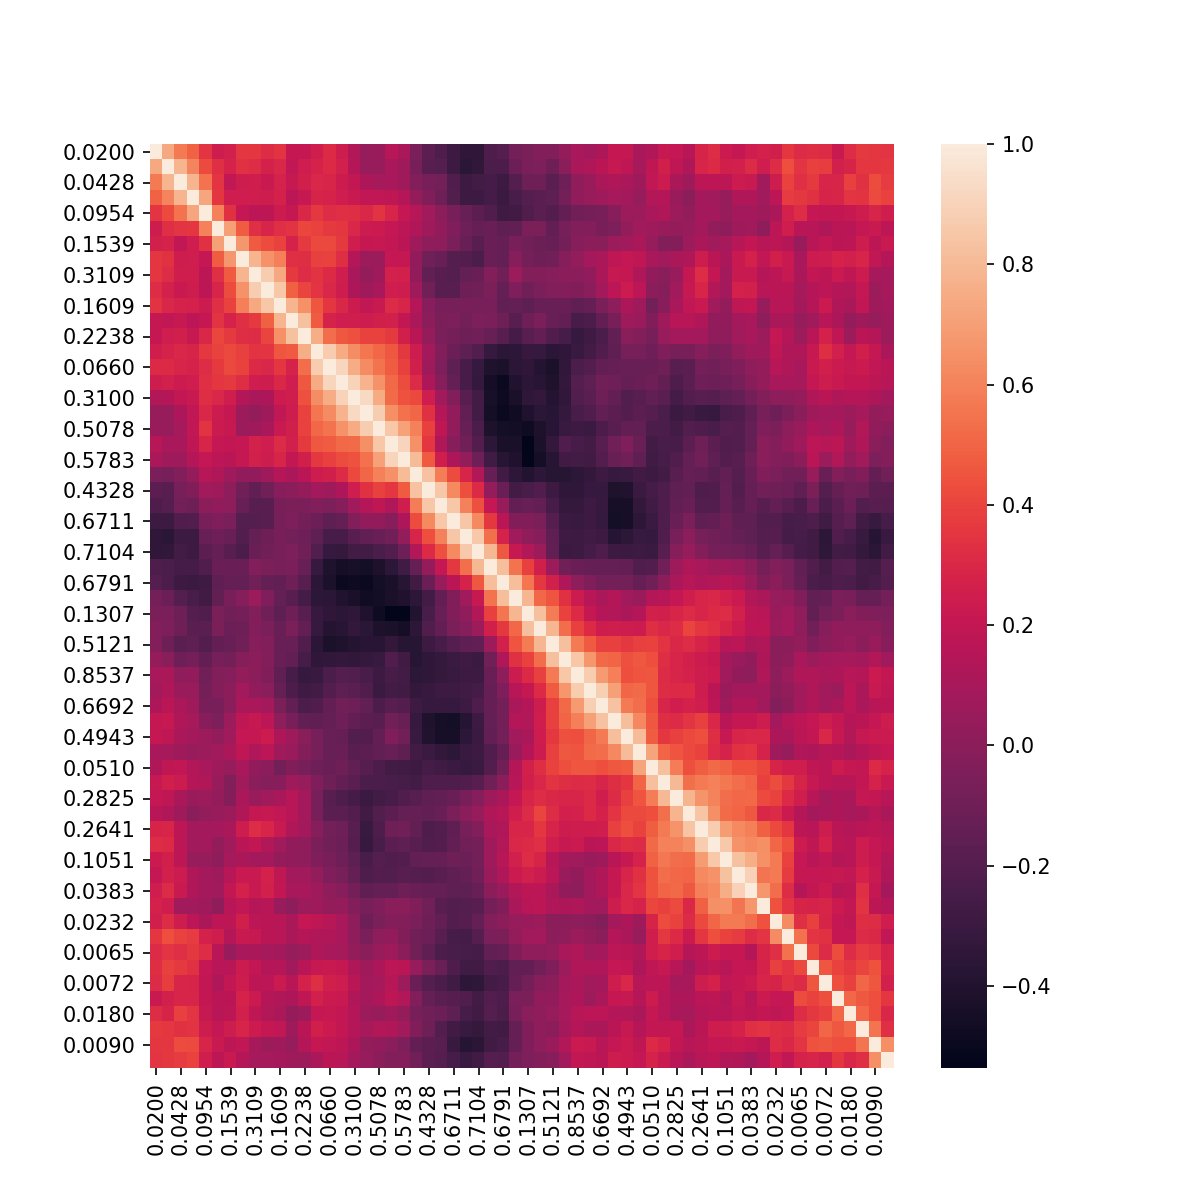

In [12]:
plt.figure().set_size_inches(8,8)
sns.heatmap(df.corr())

<IPython.core.display.Javascript object>


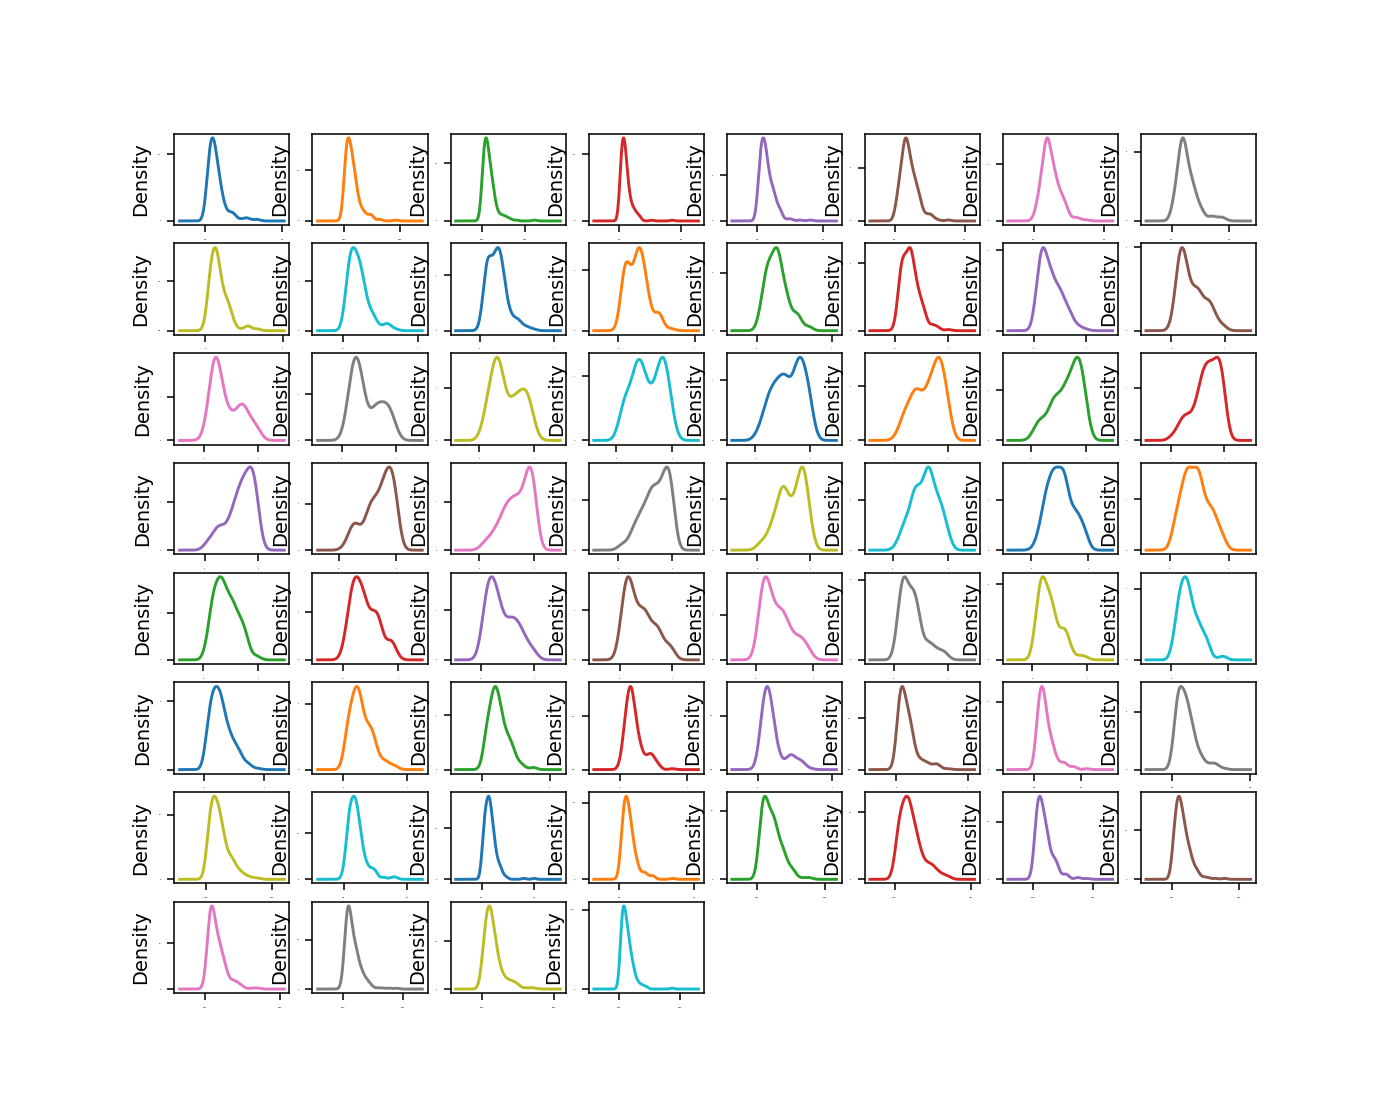

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c8cad37f0>,
      dtype=object)

In [19]:
df.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False,
              figsize=(10,8), fontsize = 0)

All the columns follow Normal distribution. Scaling and Normalizing will improve the Model performance

### Normalizing the data

In [20]:
X = df.drop("R", axis = 1)
y = df["R"]
print(X.shape)
print(y.shape)

(207, 60)
(207,)


In [25]:
def dist_plot(df_i, X_i):
    plt.figure()
    plt.subplot(1,2,1)
    sns.distplot(a = df_i)
    plt.title("Non Normalized data column {}".format(df_i))
    plt.subplot(1,2,2)
    sns.distplot(a = X_i)
    plt.title("Normalized data")

<IPython.core.display.Javascript object>


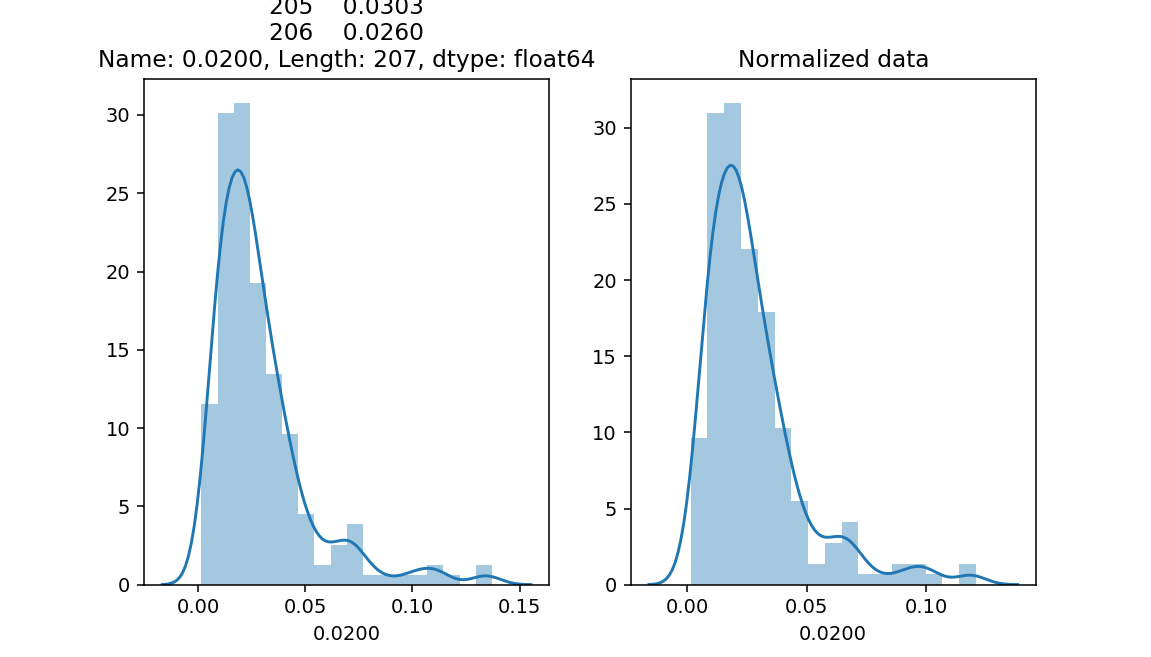

In [28]:
dist_plot(df["0.0200"], X["0.0200"])

<IPython.core.display.Javascript object>


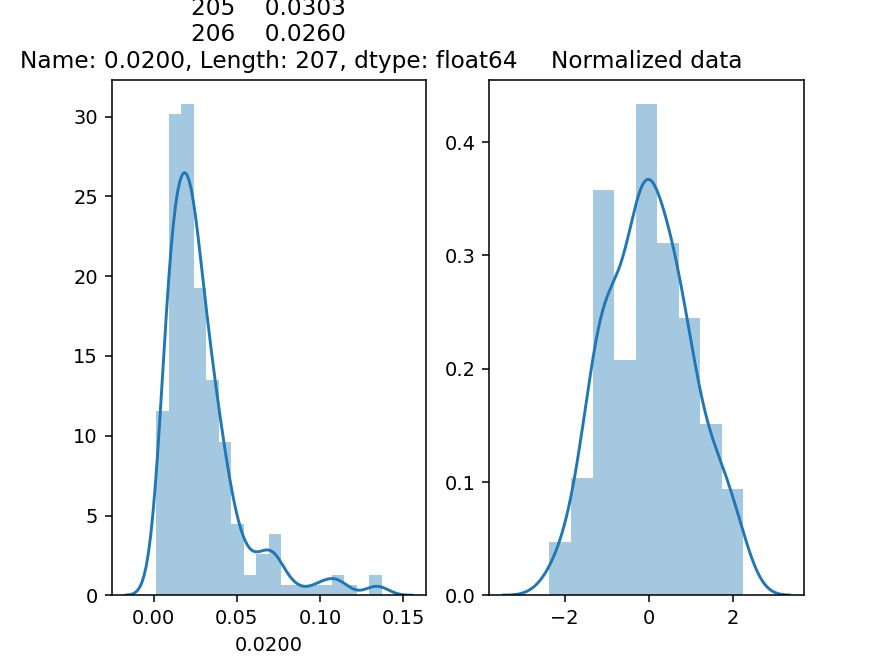

In [39]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
X_scaled = pipeline.fit_transform(X)

dist_plot(df["0.0200"], X_scaled[:,0])

### Train test split

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled, y)

## Model 1: Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dt_clf = DecisionTreeClassifier().fit(X_train,y_train)

In [42]:
from sklearn.metrics import accuracy_score
y_predict = dt_clf.predict(X_test)
accuracy_DT = accuracy_score(y_test, y_predict)
accuracy_DT

0.7884615384615384

In [43]:
cv = cross_val_score(dt_clf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.74193548 0.64516129 0.5483871  0.80645161 0.80645161]
0.7096774193548387


## Model 2: KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
max_acc = 0
k = 0
for i in range(1,50,2):
    knn_clf = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    y_predict = knn_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    if accuracy>max_acc:
        max_acc = accuracy
        k = i
    print("Accuracy score of k = {} is {}".format(i, accuracy))
print("Max accuracy score is {} for k = {}".format(max_acc, k))

Accuracy score of k = 1 is 0.9230769230769231
Accuracy score of k = 3 is 0.8461538461538461
Accuracy score of k = 5 is 0.7884615384615384
Accuracy score of k = 7 is 0.7692307692307693
Accuracy score of k = 9 is 0.7692307692307693
Accuracy score of k = 11 is 0.7115384615384616
Accuracy score of k = 13 is 0.6538461538461539
Accuracy score of k = 15 is 0.6730769230769231
Accuracy score of k = 17 is 0.6538461538461539
Accuracy score of k = 19 is 0.6538461538461539
Accuracy score of k = 21 is 0.6538461538461539
Accuracy score of k = 23 is 0.6538461538461539
Accuracy score of k = 25 is 0.6538461538461539
Accuracy score of k = 27 is 0.6923076923076923
Accuracy score of k = 29 is 0.6538461538461539
Accuracy score of k = 31 is 0.6538461538461539
Accuracy score of k = 33 is 0.6346153846153846
Accuracy score of k = 35 is 0.6346153846153846
Accuracy score of k = 37 is 0.6346153846153846
Accuracy score of k = 39 is 0.6538461538461539
Accuracy score of k = 41 is 0.6538461538461539
Accuracy score of 

In [46]:
KNeighborsClassifier(n_neighbors = 1).fit(X_train,y_train)
cv = cross_val_score(knn_clf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80645161 0.70967742 0.67741935 0.67741935 0.70967742]
0.7161290322580645


Underfitting

## Model 3: Logistic regression

In [45]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(max_iter = 1000).fit(X_train,y_train)
y_predict = lr_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

0.8846153846153846


In [48]:
cv = cross_val_score(lr_clf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.87096774 0.77419355 0.67741935 0.80645161 0.77419355]
0.7806451612903226


## Model 4: SVC

In [49]:
from sklearn.svm import SVC
svc_clf = SVC(kernel = 'linear').fit(X_train,y_train)
y_predict = svc_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

0.8461538461538461


In [50]:
cv = cross_val_score(svc_clf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80645161 0.74193548 0.61290323 0.77419355 0.83870968]
0.7548387096774194


In [51]:
from sklearn.svm import SVC
svc_clf = SVC(kernel = 'rbf').fit(X_train,y_train)
y_predict = svc_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

0.8461538461538461


In [52]:
cv = cross_val_score(svc_clf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.83870968 0.74193548 0.93548387 0.80645161 0.83870968]
0.832258064516129


## Model 5: Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier().fit(X_train, y_train)
y_predict = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

0.8076923076923077


In [54]:
cv = cross_val_score(rf_clf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80645161 0.77419355 0.87096774 0.80645161 0.87096774]
0.8258064516129032


# Tuning parameters

In [58]:
#Logistic regression

In [55]:
from sklearn.model_selection import GridSearchCV 
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear', 'sag']}

lr_clf = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_lr_clf = lr_clf.fit(X_train,y_train)
print('Best Score: ' + str(best_lr_clf.best_score_))
print('Best Parameters: ' + str(best_lr_clf.best_params_))

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.7s


Best Score: 0.7935483870967742
Best Parameters: {'C': 0.23357214690901212, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    1.7s finished


In [57]:
y_predict = best_lr_clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.8653846153846154

In [59]:
#SVC

In [60]:
svc = SVC(probability = False)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 ]
svc_clf = GridSearchCV(svc, param_grid = param_grid, cv = 3, verbose = True, n_jobs = -1)
best_svc_clf = svc_clf.fit(X_train,y_train)
print('Best Score: ' + str(best_svc_clf.best_score_))
print('Best Parameters: ' + str(best_svc_clf.best_params_))

Fitting 3 folds for each of 35 candidates, totalling 105 fits
Best Score: 0.7415786827551534
Best Parameters: {'C': 0.1, 'kernel': 'linear'}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    0.1s finished


In [61]:
y_predict = best_svc_clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.8461538461538461

So we have two ML models: KNN and Logistic regression giving very good results